# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
api_key = 'ee4bc4a5fed181f77619a9157769995f'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

In [3]:
cities[:10]

['new norfolk',
 'beyneu',
 'cape town',
 'moose factory',
 'dikson',
 'leningradskiy',
 'ushuaia',
 'newport',
 'camacha',
 'taolanaro']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Creating a for loop to query one city at a time

# Staring lists
city_names = []
latitudes = []
longitudes = []
temps = []
wind_speed = []
humidity = []
countries = []
cloudiness = []
description = []

for i in range(len(cities)):
    city = cities[i]
    url = "http://api.openweathermap.org/data/2.5/find?q=" + city + "&units=imperial&APPID=" + api_key
    # Log
    print('Checking city number ' + str(i) + ': ' + city)
    page = requests.get(url)
    json_response = page.json()
    if 'list'in json_response.keys() and json_response['list'] != []:
        city_names.append(json_response['list'][0]['name'])
        temps.append(json_response['list'][0]['main']['temp'])
        latitudes.append(json_response['list'][0]['coord']['lat'])
        longitudes.append(json_response['list'][0]['coord']['lon'])
        wind_speed.append(json_response['list'][0]['wind']['speed'])
        humidity.append(json_response['list'][0]['main']['humidity'])
        countries.append(json_response['list'][0]['sys']['country'])
        cloudiness.append(json_response['list'][0]['clouds']['all'])
        description.append(json_response['list'][0]['weather'][0]['description'])
        

Checking city number 0: new norfolk
Checking city number 1: beyneu
Checking city number 2: cape town
Checking city number 3: moose factory
Checking city number 4: dikson
Checking city number 5: leningradskiy
Checking city number 6: ushuaia
Checking city number 7: newport
Checking city number 8: camacha
Checking city number 9: taolanaro
Checking city number 10: qaanaaq
Checking city number 11: amarwara
Checking city number 12: yuzhno-yeniseyskiy
Checking city number 13: busselton
Checking city number 14: kodiak
Checking city number 15: chokurdakh
Checking city number 16: bluff
Checking city number 17: lappeenranta
Checking city number 18: saint-raymond
Checking city number 19: sayat
Checking city number 20: carnarvon
Checking city number 21: hithadhoo
Checking city number 22: upernavik
Checking city number 23: sao filipe
Checking city number 24: faya
Checking city number 25: bakchar
Checking city number 26: rabo de peixe
Checking city number 27: syracuse
Checking city number 28: bengkul

Checking city number 233: dunedin
Checking city number 234: deming
Checking city number 235: bonavista
Checking city number 236: agadez
Checking city number 237: batagay
Checking city number 238: nanortalik
Checking city number 239: lavrentiya
Checking city number 240: kargasok
Checking city number 241: belogorsk
Checking city number 242: puerto el triunfo
Checking city number 243: suihua
Checking city number 244: isla mujeres
Checking city number 245: aykhal
Checking city number 246: san quintin
Checking city number 247: longyearbyen
Checking city number 248: rio grande
Checking city number 249: dingle
Checking city number 250: chuy
Checking city number 251: ancud
Checking city number 252: abashiri
Checking city number 253: mezen
Checking city number 254: ciras
Checking city number 255: port macquarie
Checking city number 256: acarau
Checking city number 257: temaraia
Checking city number 258: clyde river
Checking city number 259: torbay
Checking city number 260: ciawi
Checking city n

Checking city number 467: bilibino
Checking city number 468: harlingen
Checking city number 469: sharjah
Checking city number 470: bathsheba
Checking city number 471: hay river
Checking city number 472: rehoboth
Checking city number 473: tocopilla
Checking city number 474: lazaro cardenas
Checking city number 475: portobelo
Checking city number 476: manicore
Checking city number 477: vanavara
Checking city number 478: ishurdi
Checking city number 479: korla
Checking city number 480: roald
Checking city number 481: ekibastuz
Checking city number 482: luganville
Checking city number 483: jacareacanga
Checking city number 484: aldan
Checking city number 485: labuan
Checking city number 486: cabo san lucas
Checking city number 487: nkhotakota
Checking city number 488: vardo
Checking city number 489: fare
Checking city number 490: sosnovoborsk
Checking city number 491: rocha
Checking city number 492: noumea
Checking city number 493: linxia
Checking city number 494: vikhorevka
Checking city 

In [5]:
cities_df = pd.DataFrame(data = {
        'City'        : city_names,
        'Lat'         : latitudes,
        'Lng'         : longitudes,
        'Temp'        : temps,
        'Wind Speed'  : wind_speed,
        'Humidity'    : humidity,
        'Cloudiness'  : cloudiness,
        'Description' : description,
        'Country'     : countries})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df.to_csv(output_data_file, index=False)

In [7]:
cities_df.head(20)

,City,Lat,Lng,Temp,Wind Speed,Humidity,Cloudiness,Description,Country
0,New Norfolk,-42.7802,147.0615,82.40,12.75,44,0,Sky is Clear,AU
1,Beyneu,45.3214,55.1862,23.27,3.15,88,56,broken clouds,KZ
2,Cape Town,-33.9290,18.4174,62.60,8.05,82,0,Sky is Clear,ZA
3,Moose Factory,51.2585,-80.6095,-22.01,4.70,74,1,sky is clear,CA
4,Dikson,73.5069,80.5464,-19.98,8.75,88,0,Sky is Clear,RU
5,Leningradskiy,69.3833,178.4167,-14.18,5.39,87,0,Sky is Clear,RU
6,Ushuaia,-54.8070,-68.3074,44.60,23.04,81,40,drizzle,AR
7,Newport,51.5882,-2.9975,34.66,5.82,94,20,few clouds,GB
8,Camacha,33.0833,-16.3334,60.04,6.93,67,75,broken clouds,PT
9,Qaanaaq,77.4840,-69.3633,-8.96,10.31,81,0,Sky is Clear,GL


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

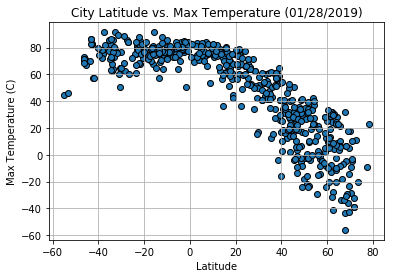

In [8]:
plt.scatter(x = 'Lat',
            y = 'Temp',
            data = cities_df,
            edgecolors = 'black')

_ = plt.title('City Latitude vs. Max Temperature (01/28/2019)')
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Max Temperature (C)')
_ = plt.grid()
_ = plt.savefig('output_data/latitude_vs_max_temp.png')

#### Latitude vs. Humidity Plot

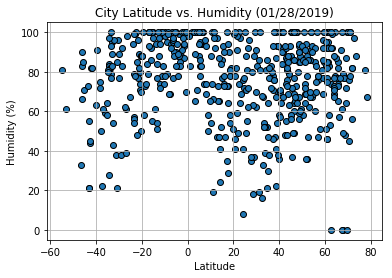

In [9]:
plt.scatter(x = 'Lat',
            y = 'Humidity',
            data = cities_df,
            edgecolors = 'black')

_ = plt.title('City Latitude vs. Humidity (01/28/2019)')
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Humidity (%)')
_ = plt.grid()
_ = plt.savefig('output_data/latitude_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

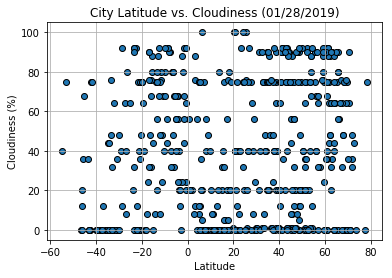

In [10]:
plt.scatter(x = 'Lat',
            y = 'Cloudiness',
            data = cities_df,
            edgecolors = 'black')

_ = plt.title('City Latitude vs. Cloudiness (01/28/2019)')
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Cloudiness (%)')
_ = plt.grid()
_ = plt.savefig('output_data/latitude_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

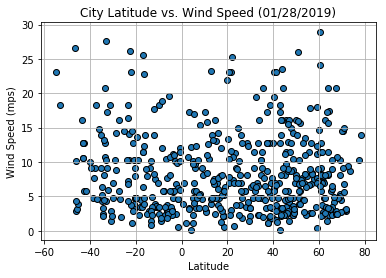

In [11]:
plt.scatter(x = 'Lat',
            y = 'Wind Speed',
            data = cities_df,
            edgecolors = 'black')

_ = plt.title('City Latitude vs. Wind Speed (01/28/2019)')
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Wind Speed (mps)')
_ = plt.grid()
_ = plt.savefig('output_data/latitude_vs_wind_speed.png')